In [25]:
import requests
from bs4 import BeautifulSoup as bs

In [26]:
import numpy as np 
import pandas as pd
import os

In [27]:
data = []

In [120]:
HEADERS = ({'User-Agent':
            'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2228.0 Safari/537.36',
            'Accept-Language': 'en-US, en;q=0.5'})

In [28]:
for i in range(1,101):
    
    url= ("https://www.goodreads.com/list/show/1.Best_Books_Ever?page={}".format(i))
    print(url)
    page = requests.get(url,  headers=HEADERS)
    soup = bs(page.content, 'html.parser')
    titles = soup.find_all('a', class_='bookTitle')
    authors = soup.find_all('a', class_='authorName')
    minirating = soup.find_all('span', class_='minirating')
    for title, author,minirating in zip(titles, authors,minirating):
        if minirating.get_text().split()[0] == 'really' or minirating.get_text().split()[0] == 'it':
            continue
        else:
            data.append({'Title':title.get_text(strip=True),
                         'Authors':author.get_text(strip=True),
                         'Avg Rating':minirating.get_text().split()[0],
                         'Ratings':minirating.get_text().split()[4]}
                       )
        
    

https://www.goodreads.com/list/show/1.Best_Books_Ever?page=1


In [100]:
df = pd.DataFrame(data)

In [101]:
#df.to_csv('books.csv',sep = ';',index=False)  #export to csv fetched data
df = pd.read_csv('books.csv',delimiter=';') #read csv file

In [102]:
df.tail()

,Title,Author,Avg Rating,Ratings
9732,"The Charlemagne Pursuit (Cotton Malone, #4)",Steve Berry,3.92,"22,097"
9733,Crenshaw,Katherine Applegate,3.99,"26,294"
9734,Exit Rostov,Henry Virgin,4.30,477
9735,ماذا خسر العالم بانحطاط المسلمين,أبو الحسن علي الندوي,4.13,"4,828"
9736,The Years of Rice and Salt,Kim Stanley Robinson,3.74,"12,095"


In [103]:
df.tail()

,Title,Author,Avg Rating,Ratings
9732,"The Charlemagne Pursuit (Cotton Malone, #4)",Steve Berry,3.92,"22,097"
9733,Crenshaw,Katherine Applegate,3.99,"26,294"
9734,Exit Rostov,Henry Virgin,4.30,477
9735,ماذا خسر العالم بانحطاط المسلمين,أبو الحسن علي الندوي,4.13,"4,828"
9736,The Years of Rice and Salt,Kim Stanley Robinson,3.74,"12,095"


### Columns Description:

* **Title** - contains the titles of the books
* **Author** - contains the author of the particular book
* **Avg Rating** - the average rating of the books, as decided by the users
* **Ratings** - Contains the number of ratings given for the book

In [104]:
#Finding Number of rows and columns
print("Dataset contains {} rows and {} columns".format(df.shape[0], df.shape[1]))

Dataset contains 9737 rows and 4 columns


## Data Analysis  
###### Which are the books with most occurances in the list?

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

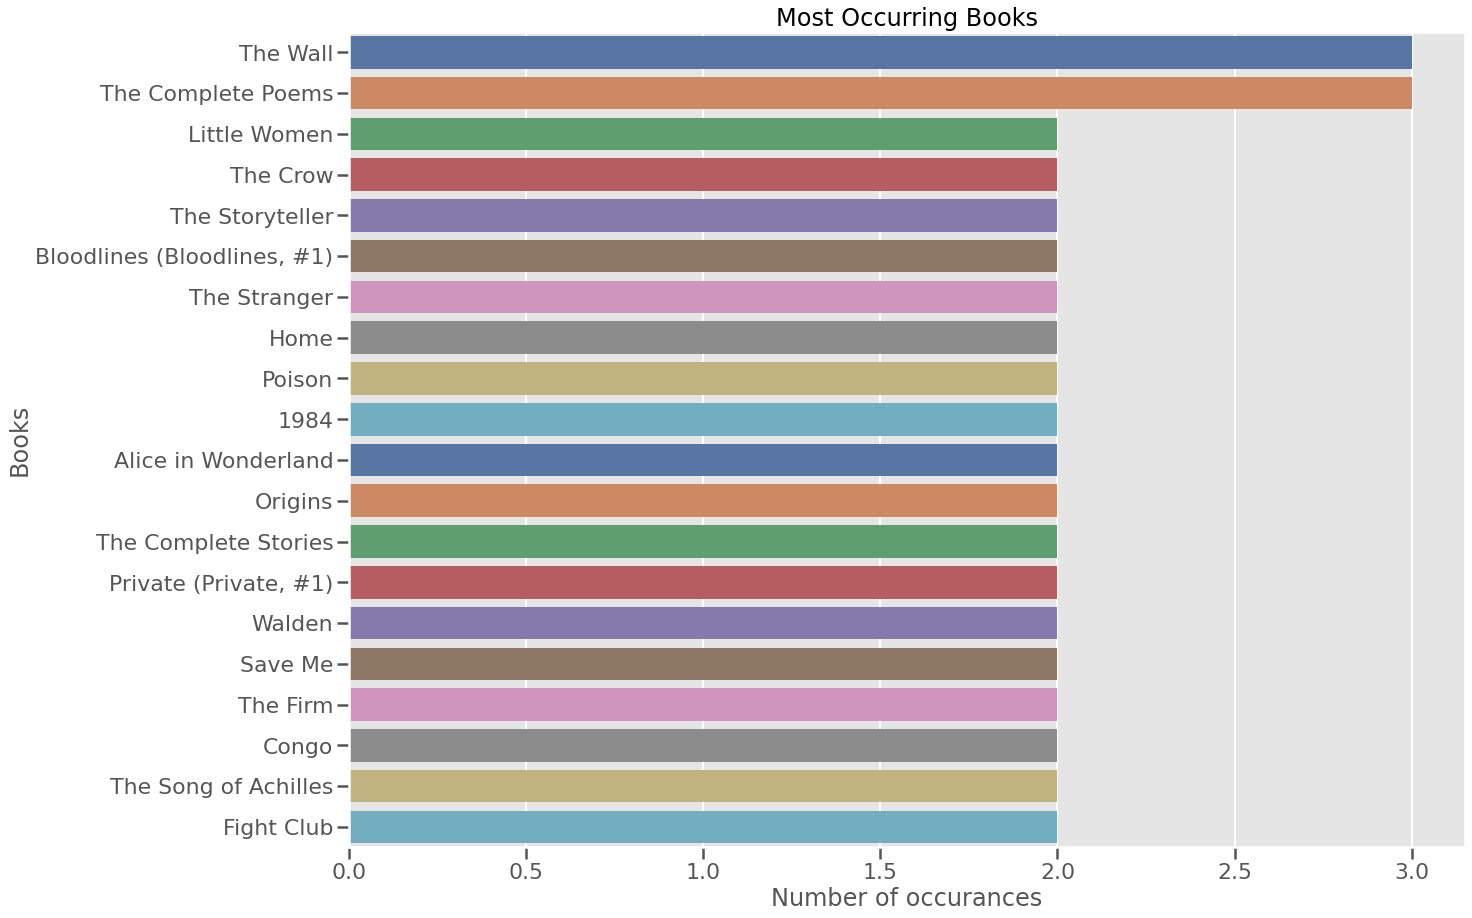

In [105]:
sns.set_context('poster')
plt.figure(figsize=(20,15))
books = df['Title'].value_counts()[:20]
rating = df['Avg Rating'][:20]
sns.barplot(x = books, y = books.index, palette='deep')
plt.title("Most Occurring Books")
plt.xlabel("Number of occurances")
plt.ylabel("Books")
plt.show()

/Users/temerbekkozha/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


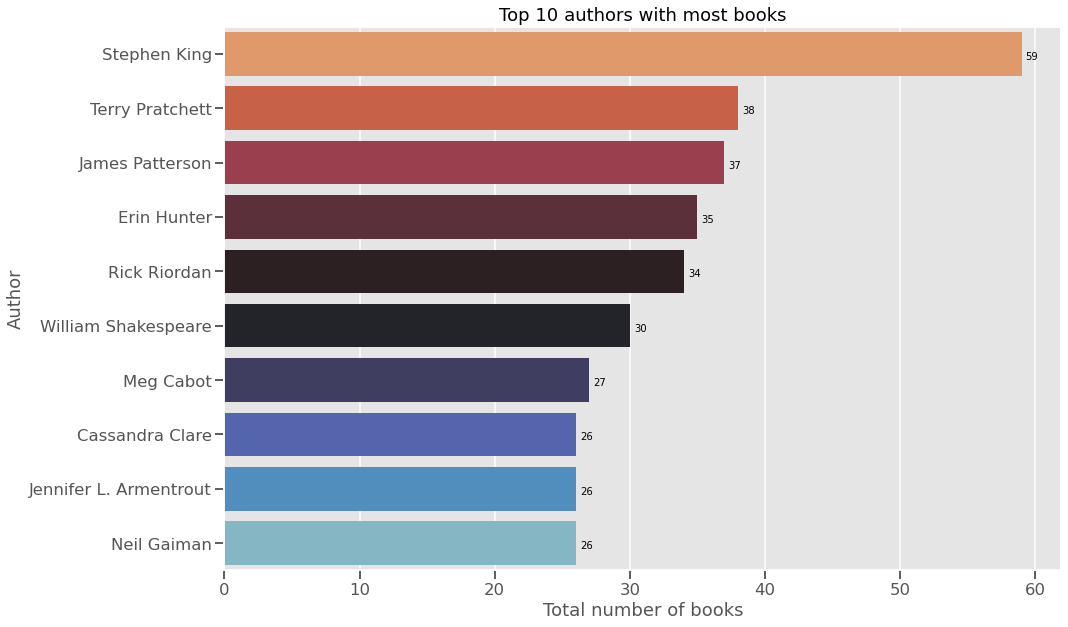

In [106]:
sns.set_context('talk')
most_books = df.groupby('Author')['Title'].count().reset_index().sort_values('Title', ascending=False).head(10).set_index('Author')
plt.figure(figsize=(15,10))
ax = sns.barplot(most_books['Title'], most_books.index, palette='icefire_r')
ax.set_title("Top 10 authors with most books")
ax.set_xlabel("Total number of books")
for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+0.5, str(round(i.get_width())), fontsize = 10, color = 'k')

In [107]:
df['Author'].value_counts().head(10)

Stephen King              59
Terry Pratchett           38
James Patterson           37
Erin Hunter               35
Rick Riordan              34
William Shakespeare       30
Meg Cabot                 27
Cassandra Clare           26
Neil Gaiman               26
Jennifer L. Armentrout    26
Name: Author, dtype: int64

## Which are the top 10 highly rated authors? 

/Users/temerbekkozha/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


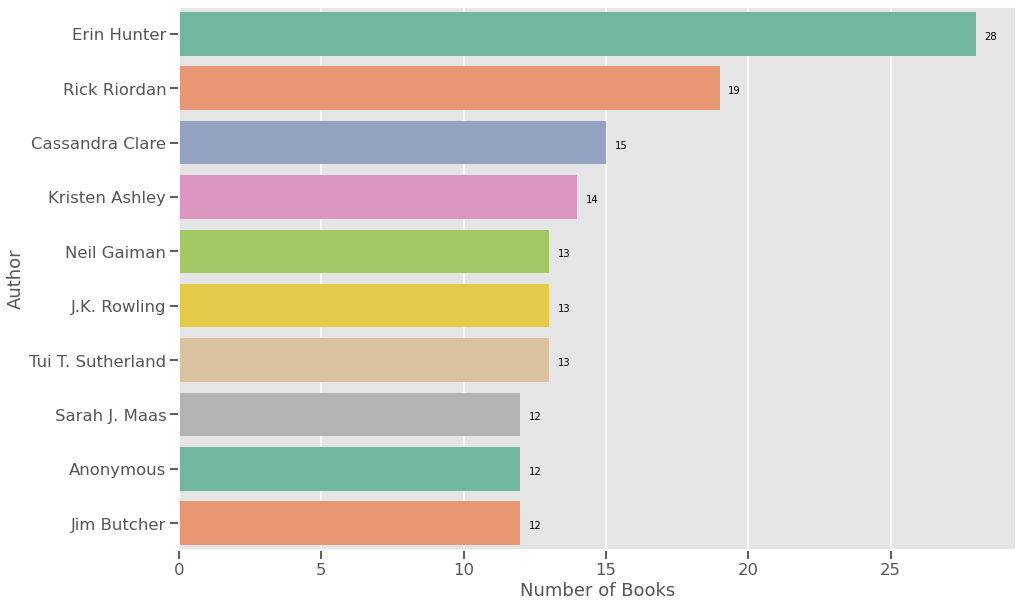

In [108]:
high_rated_author = df[df['Avg Rating'].astype(float)>=4.3]
high_rated_author = high_rated_author.groupby('Author')['Title'].count().reset_index().sort_values('Title', ascending = False).head(10).set_index('Author')
plt.figure(figsize=(15,10))
ax = sns.barplot(high_rated_author['Title'], high_rated_author.index, palette='Set2')
ax.set_xlabel("Number of Books")
ax.set_ylabel("Author")
for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+0.5, str(round(i.get_width())), fontsize = 10, color = 'k')

## What is the rating distribution for the books? 

In [109]:
def segmentation(data):
    values = []
    for val in data['Avg Rating']:
        if val>=0 and val<=1:
            values.append("Rating: 0 and 1")
        elif val>1 and val<=2:
            values.append("Rating: 1 and 2")
        elif val>2 and val<=3:
            values.append("Rating: 2 and 3")
        elif val>3 and val<=4:
            values.append("Rating: 3 and 4")
        elif val>4 and val<=5:
            values.append("Rating: 4 and 5")
        else:
            values.append("NaN")
    print(len(values))
    return values

In [110]:
df['Avg Rating'].isnull().value_counts()

False    9737
Name: Avg Rating, dtype: int64

In [111]:
df.dropna(0, inplace=True)
#Removing Any null values

/Users/temerbekkozha/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Avg Rating', ylabel='Density'>

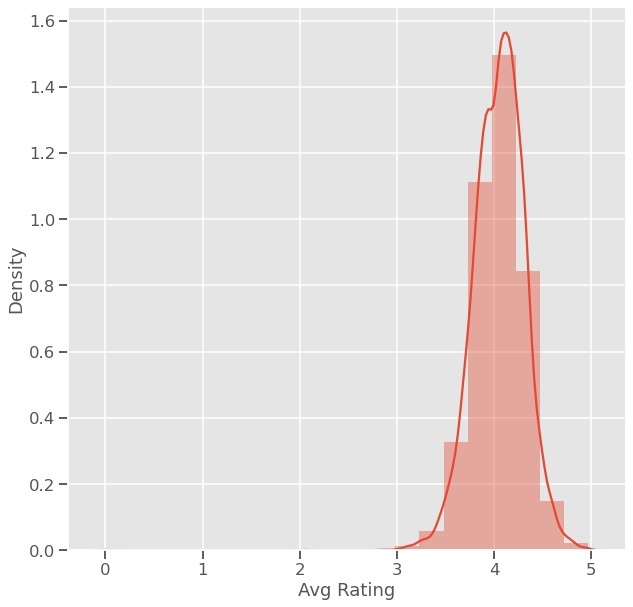

In [112]:
plt.figure(figsize=(10,10))
rating= df['Avg Rating'].astype(float)
sns.distplot(rating, bins=20)

**From the given plot, we can infer that:**

* Majority of the ratings lie near 3.7-4.3, approximately.
* Books having scores near 5 are extremely rare

9737


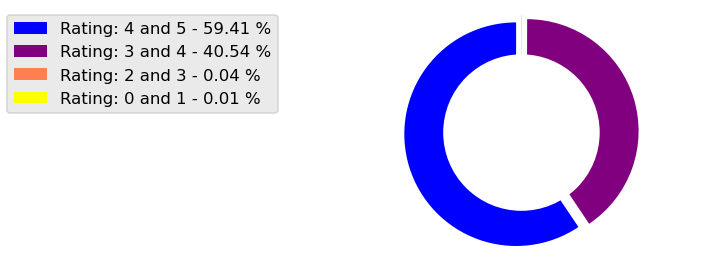

In [113]:
df['Ratings Dist'] = segmentation(df)
ratings_pie = df['Ratings Dist'].value_counts().reset_index()
labels = ratings_pie['index']
colors = ['blue','purple','coral','yellow', 'black']
percent = 100.*ratings_pie['Ratings Dist']/ratings_pie['Ratings Dist'].sum()
fig, ax1 = plt.subplots()
ax1.pie(ratings_pie['Ratings Dist'],colors = colors, pctdistance=0.85, startangle=90, explode=(0.05, 0.05, 0.05, 0.05))
#Draw a piechart:
centre_circle = plt.Circle((0,0), 0.70, fc ='white')
fig1 = plt.gcf()
fig1.gca().add_artist(centre_circle)

plt.axis('equal')
plt.tight_layout()
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(labels, percent)]
plt.legend( labels, loc = 'best',bbox_to_anchor=(-0.1, 1.),)

## Simple Recommendation System 

In [169]:
from sklearn import neighbors
from sklearn.preprocessing import MinMaxScaler

In [181]:
books_features = pd.concat([df['Ratings Dist'].str.get_dummies(sep=","), df['Avg Rating'], df['Ratings']
                            .apply(lambda x: str(x.replace(',','')))], axis=1)

In [182]:
books_features.head()

,Rating: 0 and 1,Rating: 2 and 3,Rating: 3 and 4,Rating: 4 and 5,Avg Rating,Ratings
0,0,0,0,1,4.32,7038574
1,0,0,0,1,4.50,2800280
2,0,0,0,1,4.27,5011307
3,0,0,0,1,4.27,3396111
4,0,0,1,0,3.62,5476973


In [183]:
min_max_scaler = MinMaxScaler()
books_features = min_max_scaler.fit_transform(books_features)

In [184]:
np.round(books_features, 2)

array([[0.  , 0.  , 0.  , 1.  , 0.87, 0.88],
       [0.  , 0.  , 0.  , 1.  , 0.91, 0.35],
       [0.  , 0.  , 0.  , 1.  , 0.86, 0.63],
       ...,
       [0.  , 0.  , 0.  , 1.  , 0.87, 0.  ],
       [0.  , 0.  , 0.  , 1.  , 0.83, 0.  ],
       [0.  , 0.  , 1.  , 0.  , 0.75, 0.  ]])

In [177]:
model = neighbors.NearestNeighbors(n_neighbors=6, algorithm='ball_tree')
model.fit(books_features)
distance, indices = model.kneighbors(books_features)

In [199]:
def getId(name):
    return df[df['Title']==name].index.tolist()[0]

all_books_names = list(df['Title'].values)

def getBooksFromPartialName(partial):
    for name in all_books_names:
        if partial in name:
            print(name,all_books_names.index(name))
            
def getSameBooks(query=None,id=None):
    if id:
        for id in indices[id][1:]:
            print(df.iloc[id]['Title'])
    if query:
        found_id = getId(query)
        for id in indices[found_id][1:]:
            print(df.iloc[id]['Title'])

In [193]:
getSameBooks("Crenshaw")

Raise the Titanic! (Dirk Pitt, #4)
Inca Gold (Dirk Pitt, #12)
Ruthless People (Ruthless People, #1)
High Noon
Running Out of Time


In [200]:
getBooksFromPartialName("Hobbit")

J.R.R. Tolkien 4-Book Boxed Set: The Hobbit and The Lord of the Rings 8
The Hobbit, or There and Back Again 133
The Hobbit 1852
The Hobbit, Part One 3581
